

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.


## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('petrol.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df1=df
df.shape

(48, 5)

In [4]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

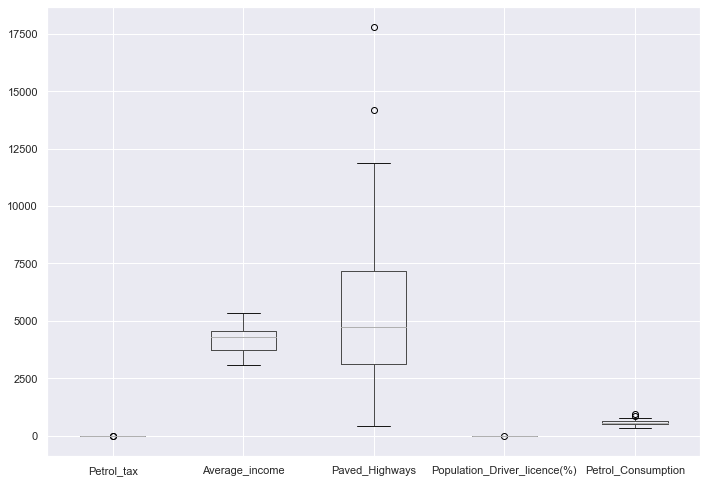

In [8]:
df.boxplot()

## Petrol_tax

In [9]:
q1=df1['Petrol_tax'].quantile(0.25)
q3=df1['Petrol_tax'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['Petrol_tax']<ll) | (df1['Petrol_tax']>ul))]
df1.shape

1.125


(46, 5)

## Average_income

In [10]:
q1=df1['Average_income'].quantile(0.25)
q3=df1['Average_income'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df1['Average_income']<ll) | (df1['Average_income']>ul))]
df1.shape

831.5


(46, 5)

## Paved_Highways

In [11]:
q1=df1['Paved_Highways'].quantile(0.25)
q3=df1['Paved_Highways'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df1['Paved_Highways']<ll) | (df1['Paved_Highways']>ul))]
df1.shape

3594.5


(45, 5)

## Population_Driver_licence(%)

In [12]:
q1=df1['Population_Driver_licence(%)'].quantile(0.25)
q3=df1['Population_Driver_licence(%)'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df1['Population_Driver_licence(%)']<ll) | (df1['Population_Driver_licence(%)']>ul))]
df1.shape

0.07199999999999995


(44, 5)

## Petrol_Consumption

In [13]:
q1=df1['Petrol_Consumption'].quantile(0.25)
q3=df1['Petrol_Consumption'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df1['Petrol_Consumption']<ll) | (df1['Petrol_Consumption']>ul))]
df1.shape

110.75


(42, 5)

<AxesSubplot:>

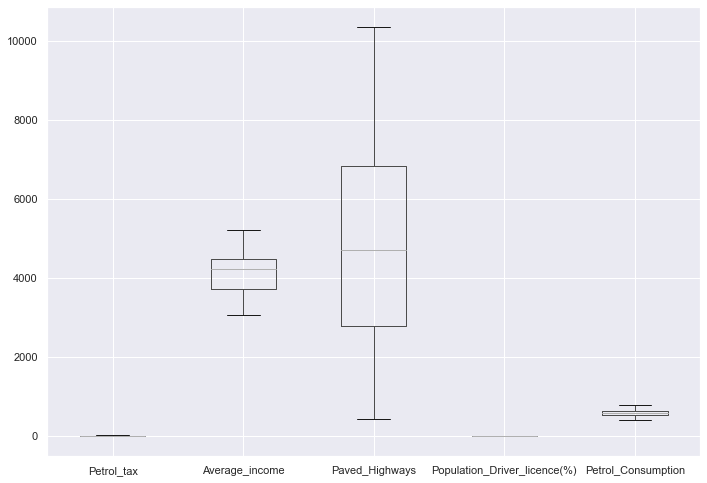

In [14]:
df1.boxplot()

# Question 3 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

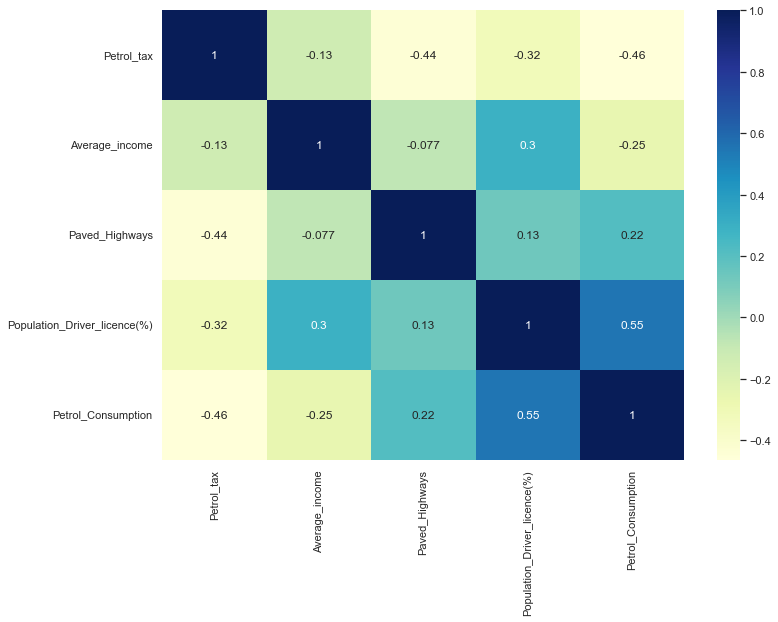

In [15]:
sns.heatmap(df1.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [16]:
df1.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,-0.133841,-0.443926,-0.316342,-0.463247
Average_income,-0.133841,1.000000,-0.076862,0.296002,-0.254464
Paved_Highways,-0.443926,-0.076862,1.000000,0.133983,0.215182
Population_Driver_licence(%),-0.316342,0.296002,0.133983,1.000000,0.549161
Petrol_Consumption,-0.463247,-0.254464,0.215182,0.549161,1.000000


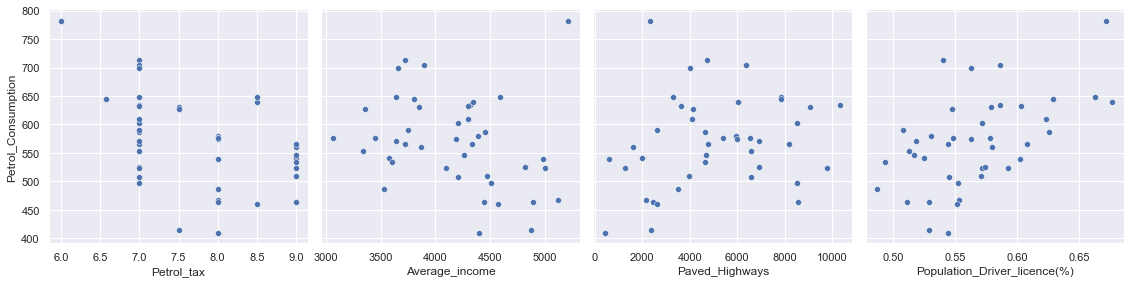

In [17]:
sns.pairplot(df1, x_vars=['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)'], y_vars='Petrol_Consumption', height=4, aspect=1, kind='scatter')
plt.show()

In [18]:
# Model Building 
#import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [19]:
Y=df1['Petrol_Consumption']
X=df1['Population_Driver_licence(%)']

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state =0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33,) (33,)
(9,) (9,)


# Question 5 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [22]:
# Model Building 
#import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

#Fitting the model 
model=sm.OLS(Y_train,X_train).fit()

# Performing a summary operation lists out all the different parameters of the regression line fitted
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2300.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                    2.22e-31
Time:                        01:34:09   Log-Likelihood:                         -186.27
No. Observations:                  33   AIC:                                      374.5
Df Residuals:                      32   BIC:                                      376.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Population_Driver_licence(%)  1004.7841     20.950     47.960      0.000     962.109    1047.459
==============================================================================
Omnibus:                        2.239   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.880
Skew:                           0.572   Prob(JB):                        0.391
Kurtosis:                       2.757   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R-Square 

# Question 6 - Evaluate the model 
Calculate the accuracy score for the above model.

## Training Accuracy

In [23]:
# Predict the y values corresponding to X_train
pred_y=model.predict(X_train)



from sklearn.metrics import r2_score

r_squared = r2_score(Y_train, pred_y)
print(r_squared)

0.30477516772557733


## Testing Accuracy

In [24]:
# Predict the y values corresponding to X_test
pred_y=model.predict(X_test)


from sklearn.metrics import r2_score

r_squared = r2_score(Y_test, pred_y)
print(r_squared)


0.048630477902522284


# Question 7: Repeat the same Multi linear regression modelling by adding both Petrol tax, Income and Highway features
Find R2 


In [25]:
Y=df1.Petrol_Consumption
X=df1.drop(['Petrol_Consumption'],axis=1)


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state =0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(29, 4) (29,)
(13, 4) (13,)


In [26]:
model=sm.OLS(Y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              599.9
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                    1.96e-24
Time:                        01:34:11   Log-Likelihood:                         -159.67
No. Observations:                  29   AIC:                                      327.3
Df Residuals:                      25   BIC:                                      332.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petrol_tax                      -5.4438     10.307     -0.528      0.602     -26.671      15.784
Average_income                  -0.0545      0.022     -2.481      0.020      -0.100      -0.009
Paved_Highways                   0.0028      0.004      0.639      0.529      -0.006       0.012
Population_Driver_licence(%)  1458.3297    197.498      7.384      0.000    1051.575    1865.084
==============================================================================
Omnibus:                        3.489   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.806
Skew:                           0.759   Prob(JB):                        0.246
Kurtosis:                       2.868   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Training Accuracy

In [27]:
# Predict the y values corresponding to X_train
pred_y=model.predict(X_train)



from sklearn.metrics import r2_score

r_squared = r2_score(Y_train, pred_y)
print(r_squared)

0.4766921703255894


## Testing Accuracy

In [28]:
# Predict the y values corresponding to X_test
pred_y=model.predict(X_test)



from sklearn.metrics import r2_score

r_squared = r2_score(Y_test, pred_y)
print(r_squared)

0.30888240701503433


# Question 8: Print the coefficients of the multilinear regression model

In [29]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [30]:
regressor.coef_

array([-4.92778425e+01, -9.14403325e-02, -4.67258091e-03,  8.89320765e+02])

# Question 9 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

When there was only one independent variable Population_Driver_licence(%) in our regression the    
 summary  r square value was  98.6 %
          Adjusted r square    value was 98.6 %
          
train= 0.30477516772557733

test=  0.048630477902522284 

When there were three independent variable Petrol_tax,Average_income,Paved_Highways and Population_Driver_licence(%) in our  summary  r square value was  99.0%
         Adjusted r square    value was 98.8%
         
train= 0.4669

test=  0.30888 
       
As we have very less data for analysis therefore r square and adj. r square value is severely affected.
As more data is needed for model to gain more experience and give good result for test data.
